In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pickle

In [2]:
def inverse_transform(price):
    with open("./preprocessing/standard_scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    columns = scaler.get_feature_names_out()
    empty_data = np.array([[0.0]*len(columns)]*len(price))
    price_idx = np.where(columns=='price')[0]
    empty_data[:, price_idx] = price
    expanded_df = pd.DataFrame(data=empty_data, columns=columns)
    inverted = scaler.inverse_transform(expanded_df)
    prices = inverted[:, price_idx]
    return np.exp(prices)
#Example usage
#inverse_transform(target.values.reshape(-1,1))

In [3]:
train = pd.read_csv("./train.csv")
val = pd.read_csv("./val.csv")
test = pd.read_csv("./test.csv")

In [4]:
train_text = pd.read_csv("./train_processed_text.csv")
val_text = pd.read_csv("./val_processed_text.csv")
test_text = pd.read_csv("./test_processed_text.csv")

In [5]:
train

,id,price,year,odometer,has_VIN,car_age,distance_to_city,manufacturer_Unknown manufacturer,manufacturer_acura,manufacturer_alfa-romeo,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,7310804917,1.413851,0.838965,-0.431377,1,-0.838965,-0.175017,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7310280162,1.114045,0.637787,0.056132,1,-0.637787,-0.145631,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7306277173,0.840341,1.040143,-0.706021,1,-1.040143,-0.184117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7303579544,-0.789005,-0.971636,1.069183,0,0.971636,-0.152122,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7316342608,0.518638,1.241320,-0.924180,1,-1.241320,-0.178322,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242612,7316439366,0.385342,1.040143,0.036119,1,-1.040143,-0.173054,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242613,7310781418,0.290943,-0.569280,0.272895,1,0.569280,-0.169379,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242614,7307615458,-0.387448,-0.166924,-0.087105,1,0.166924,-0.174665,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242615,7316779292,-0.982714,0.034253,0.810997,1,-0.034253,-0.177935,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_text

,id_copy,from_carvana,00,01,02,03,04,05,06,07,...,whiteinterior,window,wiper,without,wont,work,year,youdisclaimer,youre,zone
0,7310804917,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025917,0.000000,0.000000,0.0
1,7310280162,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.015893,0.000000,0.000000,0.000000,0.000000,0.014730,0.000000,0.000000,0.0
2,7306277173,1,0.040914,0.043972,0.043943,0.043914,0.043755,0.04354,0.043124,0.043619,...,0.069811,0.000000,0.000000,0.078133,0.043977,0.035159,0.000000,0.047235,0.000000,0.0
3,7303579544,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,7316342608,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.067286,0.146940,0.000000,0.000000,0.030198,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242612,7316439366,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.065999,0.032028,0.000000,0.000000,0.000000,0.020390,0.000000,0.000000,0.0
242613,7310781418,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.137094,0.000000,0.000000,0.000000,0.087276,0.000000,0.000000,0.0
242614,7307615458,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.041407,0.000000,0.000000,0.077764,0.0
242615,7316779292,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.153686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [7]:
#id is aligned so can just drop and merge them
train.drop(columns="id", inplace=True)
train_text.drop(columns="id_copy", inplace=True)
val.drop(columns="id", inplace=True)
val_text.drop(columns="id_copy", inplace=True)
test.drop(columns="id", inplace=True)
test_text.drop(columns="id_copy", inplace=True)

In [8]:
#small patch for compatible merge
for i in [train_text, val_text, test_text]:
    i["price_text"] = i['price']
    i['year_text'] = i['year']
    i['odometer_text'] = i['odometer']
    i.drop(columns=['price', 'year', 'odometer'], inplace=True)

In [9]:
train = train.join(train_text)
val = val.join(val_text)
test = test.join(test_text)

In [10]:
def make_split(df):
    price = df['price']
    return df.drop(columns="price"), price

In [11]:
def fit_model(model, df):
    X, Y = make_split(df)
    model.fit(X, Y)
    return model

In [12]:
def get_scores(model, df):
    X, Y = make_split(df)
    r2 = r2_score(Y, model.predict(X))
    mse = mean_squared_error(Y, model.predict(X))
    print(f"r2 score: {r2}")
    print(f"MSE: {mse}")
    return r2, mse

In [13]:
#Baseline Linear Model
linear_model = LinearRegression()
#L1 regularisation
lasso_model = Lasso()
#L2 regularisation
ridge_model = Ridge()
#Trees(use tree instead of forest due to slow computation from large array)
tree_model = DecisionTreeRegressor(min_samples_leaf=100) #Prevent ovefit from perfectly fitted tree
#gradient boosting
xgb_model = XGBRegressor()

In [14]:
fit_model(linear_model, train)
fit_model(lasso_model, train)
fit_model(ridge_model, train)
fit_model(tree_model, train)
fit_model(xgb_model, train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
print("Linear Model:")
linear_score = get_scores(linear_model, val)
print("Lasso Model:")
lasso__score = get_scores(lasso_model, val)
print("Ridge Model:")
ridge_score = get_scores(ridge_model, val)
print("Tree Model:")
ridge_score = get_scores(tree_model, val)
print("XGB Model:")
xgb_score = get_scores(xgb_model, val)

Linear Model:
r2 score: 0.8270645849989158
MSE: 0.1715887084808248
Lasso Model:
r2 score: -8.319919657662211e-07
MSE: 0.9922134875622552
Ridge Model:
r2 score: 0.8270210734689095
MSE: 0.17163188117184217
Tree Model:
r2 score: 0.8093891423509343
MSE: 0.18912650648347815
XGB Model:
r2 score: 0.8951268620083247
MSE: 0.10405645542418289


## Lets try with neural networks

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from tqdm import tqdm
import os

In [18]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, target_cols):
        self.dataframe = dataframe
        self.target_cols = target_cols

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        features = torch.tensor(row.loc[~row.index.isin(self.target_cols)].values, dtype=torch.float32)
        target = torch.tensor(row[self.target_cols].values, dtype=torch.float32)
        return features, target

In [19]:
new_train = CustomDataset(train, ["price"])
new_val = CustomDataset(val, ["price"])
new_test = CustomDataset(test, ["price"])

In [20]:
batch_size = 2048
train_dataloader = DataLoader(new_train, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(new_val, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(new_test, batch_size=batch_size, shuffle=True)

In [29]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.block = nn.Sequential(nn.Linear(in_features=854, out_features=2048),
                                   nn.LeakyReLU(),
                                   nn.Linear(in_features=2048, out_features=2048),
                                   nn.LeakyReLU(),
                                   nn.Linear(in_features=2048, out_features=512),
                                   nn.LeakyReLU(),
                                   nn.Dropout(p=0.5),
                                   nn.Linear(in_features=512, out_features=32),
                                   nn.LeakyReLU(),
                                   )
        
        #Converges faster without Activation at output
        self.out = nn.Sequential(nn.Linear(in_features=32, out_features=1),
                                )
    def forward(self, x):
        x = self.block(x)
        x = self.out(x)
        return x

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
simplenn = SimpleNN()
simplenn.to(device)
num_epochs = 30
optimizer = torch.optim.SGD(simplenn.parameters(), lr=0.1) #keep it simple
criterion = torch.nn.MSELoss()
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs*len(train_dataloader))

In [31]:
def train_model(device, model, num_epochs, optimizer, lr_scheduler, criterion, train, val, max_to_keep):
    print(f"using device: {device}")
    models = []
    if(not(os.path.exists("./models"))):
        os.mkdir("./models")
    for epoch in range(num_epochs):
        with tqdm(total=len(train), desc=f'Epoch {epoch + 1}/{num_epochs}') as pbar:
            model.train()
            train_loss = 0 
            for features, targets in train:
                features = features.to(device)
                targets = targets.to(device)
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                lr_scheduler.step()
                pbar.update(1)
                train_loss+=loss.item()
            pbar.set_postfix({'Train Loss': train_loss/len(train), 'LR': lr_scheduler.get_last_lr()[0]})
        #Save model
        models.append(f"./models/epoch_{epoch}")
        torch.save(model.state_dict(), models[-1])
        if(len(models)>max_to_keep):
            os.remove(models[0])
            models = models[1:]
        #Eval loop
        model.eval()
        val_loss = 0
        with tqdm(total=len(val_dataloader), desc='Running validation loop') as pbar:
            for features, targets in val:
                features = features.to(device)
                targets = targets.to(device)
                with torch.no_grad():
                    outputs = model(features)
                    loss = criterion(outputs, targets)
                    val_loss+=loss.item()
                    pbar.update(1)
            pbar.set_postfix({'Val Loss': val_loss/len(val),})
        

In [33]:
# train_model(device, simplenn, num_epochs, optimizer, lr_scheduler, criterion, train_dataloader, val_dataloader, 5)

using device: cuda


Running validation loop: 100%|██████████| 15/15 [00:14<00:00,  1.05it/s, Val Loss=0.123]


In [35]:
simplenn.load_state_dict(torch.load("./models/epoch_29"))

<All keys matched successfully>

In [36]:
simplenn.eval()
labels = []
pred = []
with torch.no_grad():
    for features, label in val_dataloader:
        pred.extend(simplenn(features.to(device)).cpu().numpy().flatten())
        labels.extend(label.numpy().flatten())

In [37]:
r2 = r2_score(labels,pred)
mse = mean_squared_error(labels, pred)
print(f"r2_score: {r2}")
print(f"MSE: {mse}")

r2_score: 0.8759863925750191
MSE: 0.12304786592721939


We choose XGBRegressor over simplenn although they have similar performance due to computation simplicity and explainability

Model fine tuning

In [13]:
from sklearn.model_selection import KFold, RandomizedSearchCV #to save time

In [14]:
X_train, y_train = make_split(train)
X_val, y_val = make_split(val)

In [15]:
#Range derived from prior randomsearch
param_grid = {
    'n_estimators': range(200, 300, 25),
    'learning_rate': np.arange(0.01, 0.3, 0.01),
    'max_depth': range(10, 20, 3),
    'subsample': np.arange(0.7, 1, 0.1),
    'colsample_bytree': np.arange(0.3, 0.7, 0.1),
    'min_child_weight': range(10, 15),
    'gamma': np.arange(0.3, 0.7, 0.1),
}

In [16]:
xgb = XGBRegressor(device='cuda')

In [17]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [18]:
#Just let this cook over the weekend. set n_jobs=1 bc timeout keeps killing other workers XD
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', n_jobs=1, cv=kf, verbose=10, random_state=42)

In [19]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START colsample_bytree=0.6000000000000001, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=12, n_estimators=225, subsample=0.8999999999999999


c:\Users\Ashley\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:05:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[CV 1/3; 1/10] END colsample_bytree=0.6000000000000001, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=12, n_estimators=225, subsample=0.8999999999999999;, score=-0.094 total time=  21.4s
[CV 2/3; 1/10] START colsample_bytree=0.6000000000000001, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=12, n_estimators=225, subsample=0.8999999999999999
[CV 2/3; 1/10] END colsample_bytree=0.6000000000000001, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=12, n_estimators=225, subsample=0.8999999999999999;, score=-0.093 total time=  22.0s
[CV 3/3; 1/10] START colsample_bytree=0.6000000000000001, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=12, n_estimators=225, subsample=0.8999999999999999
[CV 3/3; 1/10] END colsample_bytree=0.6000000000000001, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=12, n_estimators=225, subsample=0.8999999999999999;, score=-0.095 total time=  21.9s
[CV 1/3; 2/10] START colsample_bytree=0.600000000

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cuda',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=N...
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]),
                                        'max_depth': range(10, 20, 3),
                                        'min_child_weight': range(10, 15),
                                        'n_estimators': range(200, 300, 25),
                                        'subsample': array([0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=10)

In [30]:
random_search.best_params_
#  {'subsample': 0.8999999999999999,
#  'n_estimators': 250,
#  'min_child_weight': 13,
#  'max_depth': 13,
#  'learning_rate': 0.13,
#  'gamma': 0.4,
#  'colsample_bytree': 0.5}

{'subsample': 0.8999999999999999,
 'n_estimators': 250,
 'min_child_weight': 13,
 'max_depth': 13,
 'learning_rate': 0.13,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

## Error analysis

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
X, Y = make_split(val)
Y = inverse_transform(Y.values.reshape(-1,1)).flatten()
pred = inverse_transform(random_search.predict(X).reshape(-1,1)).flatten()

In [49]:
def plot_residuals(y_true, y_pred):
    """
    Plots the residuals of a regression model.

    Parameters:
    y_true (array-like): True target values.
    y_pred (array-like): Predicted target values.
    """
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of residuals
    plt.scatter(y_pred, residuals, alpha=0.7)
    
    # Add a horizontal line at 0 for reference
    plt.axhline(y=0, color='r', linestyle='--')
    
    plt.title('Residuals Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid()
    plt.show()

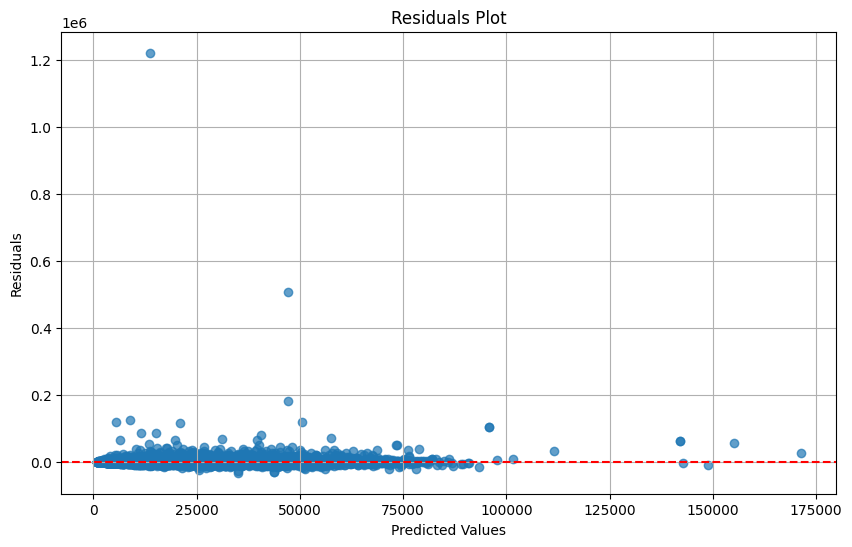

In [50]:
plot_residuals(Y, pred)

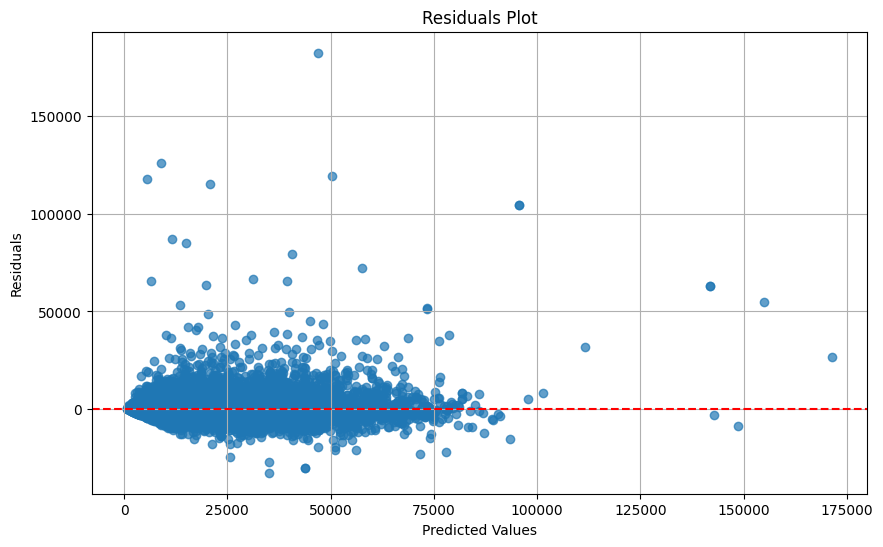

In [52]:
#Drop the 2 outlier values above 400,000 to get a better picture
filter_idx = np.where(Y<400000)[0]
plot_residuals(Y[filter_idx], pred[filter_idx])

Strong predictive power of the model, can generally predict within a $50,000 error margin, the large residuals can be largely attributed to missing data, as seen in the plots below where our top errors tend to have missing data

In [46]:
#verify using mse and r2
score = get_scores(random_search, val)

r2 score: 0.9264270837761375
MSE: 0.07299997906120816


Inspect the top and least errors

In [55]:
def extract_one_hot(df):
    oh_cols = []
    df_oh = df.drop(columns=["price", "odometer", "has_VIN", "car_age", "distance_to_city", "from_carvana"])
    for idx, row in df_oh.iterrows():
        oh_cols.append(list(row[row==1].index))
    n_unknown = [len([1 for i in oh if 'unknown' in i.lower() or 'udt' in i.lower()]) for oh in oh_cols]
    df_oh = pd.DataFrame({"oh":oh_cols, "n_unknown":n_unknown}, index=df.index)
    return df[["price", "odometer", "has_VIN", "car_age", "distance_to_city", "from_carvana"]].join(df_oh)

In [33]:
def get_top_errors(df, Y, pred, n):
    ind = np.argpartition(np.square(Y-pred), -n)[-n:]
    errors = val.iloc[ind]
    errors.loc[:, 'price'] = inverse_transform(errors['price'].values.reshape(-1,1)).flatten()
    return errors

In [35]:
top_errors = extract_one_hot(get_top_errors(val, Y, pred, 10))
top_errors

,price,odometer,has_VIN,car_age,distance_to_city,from_carvana,oh,n_unknown
7966,98772.0,0.283504,1,-0.034253,-0.183227,0,"[manufacturer_toyota, condition_excellent, cyl...",1
28582,199999.0,-1.801661,1,-0.838965,-0.183559,0,"[manufacturer_mercedes-benz, condition_excelle...",1
3842,229500.0,-2.571119,1,-1.040143,3.347981,0,"[manufacturer_other, condition_Unknown conditi...",1
26892,554900.0,-1.196892,0,-1.241320,-0.175926,0,"[manufacturer_Unknown manufacturer, condition_...",1
2834,199999.0,-1.801661,1,-0.838965,-0.183559,0,"[manufacturer_mercedes-benz, condition_excelle...",1
27233,136000.0,-2.610535,0,0.166924,-0.166700,0,"[manufacturer_Unknown manufacturer, condition_...",2
5249,1234567.0,0.669444,0,1.373992,-0.163730,0,"[manufacturer_jeep, condition_like new, cylind...",0
16556,135000.0,1.334611,0,0.770458,-0.165595,0,"[manufacturer_jeep, condition_like new, cylind...",3
892,123456.0,1.226547,0,0.770458,-0.182229,0,"[manufacturer_nissan, condition_good, cylinder...",3
18053,169999.0,-2.732396,1,-0.838965,-0.168435,0,"[manufacturer_nissan, condition_Unknown condit...",2


In [36]:
def get_least_errors(df, Y, pred, n):
    ind = np.argpartition(abs(Y-pred), n)[:n]
    errors = val.iloc[ind]
    errors.loc[:, 'price'] = inverse_transform(errors['price'].values.reshape(-1,1)).flatten()
    return errors

In [37]:
least_errors = extract_one_hot(get_least_errors(val, Y, pred, 10))
least_errors

,price,odometer,has_VIN,car_age,distance_to_city,from_carvana,oh,n_unknown
5864,49990.0,-0.857301,1,-1.442498,-0.178226,1,"[manufacturer_gmc, condition_good, cylinders_8...",0
5364,5495.0,0.645950,0,-0.235431,-0.182225,0,"[manufacturer_ford, condition_good, cylinders_...",3
24674,6990.0,0.954354,1,0.971636,-0.179837,0,"[manufacturer_bmw, condition_excellent, cylind...",0
11854,5950.0,0.712394,1,0.368102,-0.182222,0,"[manufacturer_ford, condition_excellent, cylin...",0
22893,23795.0,-1.475795,1,-1.442498,-0.181773,0,"[manufacturer_nissan, condition_excellent, cyl...",0
21959,8999.0,0.428614,0,0.368102,-0.174792,0,"[manufacturer_ford, condition_excellent, cylin...",0
24562,13999.0,-0.489744,0,0.166924,-0.176855,0,"[manufacturer_ford, condition_Unknown conditio...",1
15764,21590.0,-1.821628,1,-0.838965,-0.180082,1,"[manufacturer_buick, condition_good, cylinders...",1
18189,4000.0,0.072013,1,1.977525,-0.181987,0,"[manufacturer_buick, condition_excellent, cyli...",0
21329,10990.0,0.432673,1,-0.235431,-0.170594,0,"[manufacturer_chevrolet, condition_good, cylin...",2


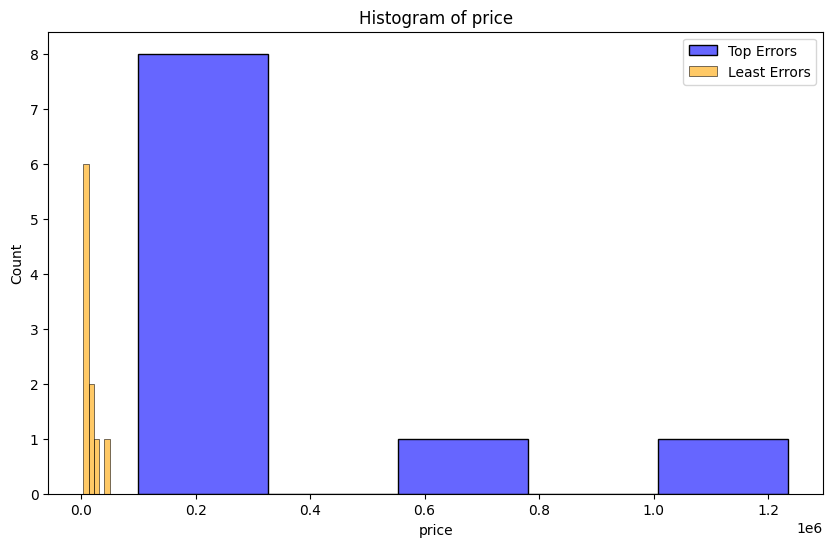

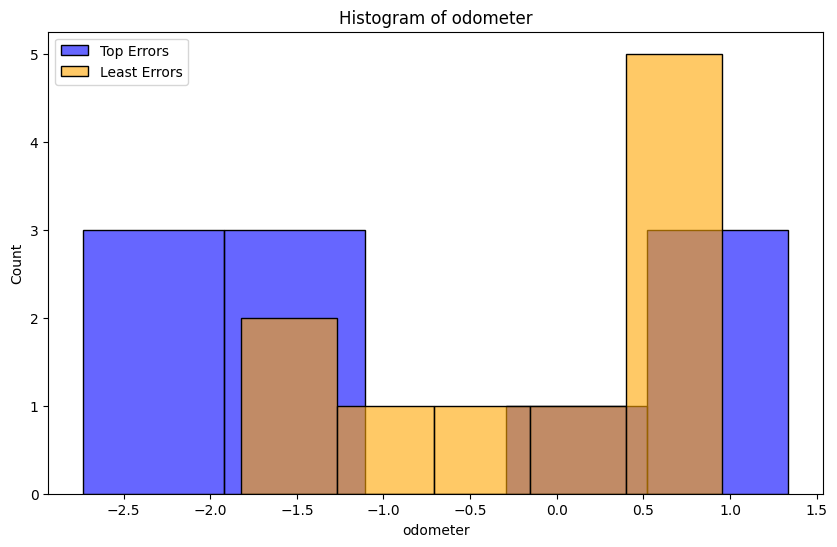

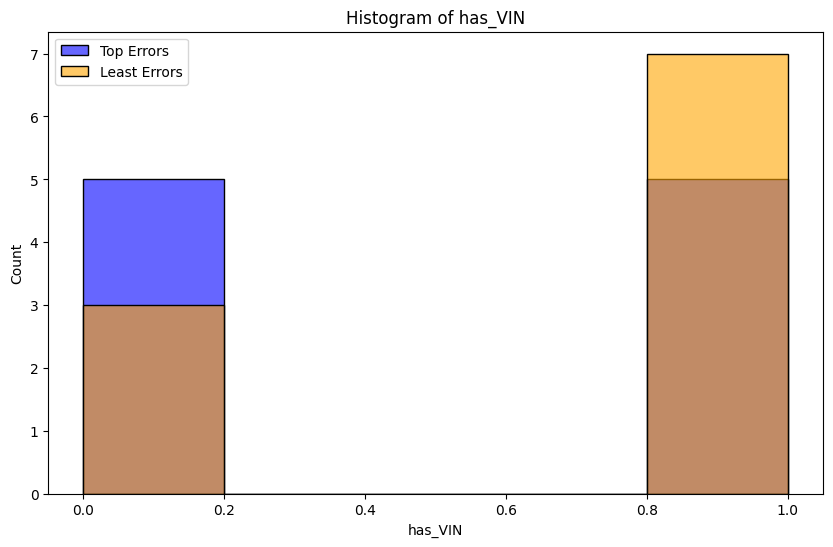

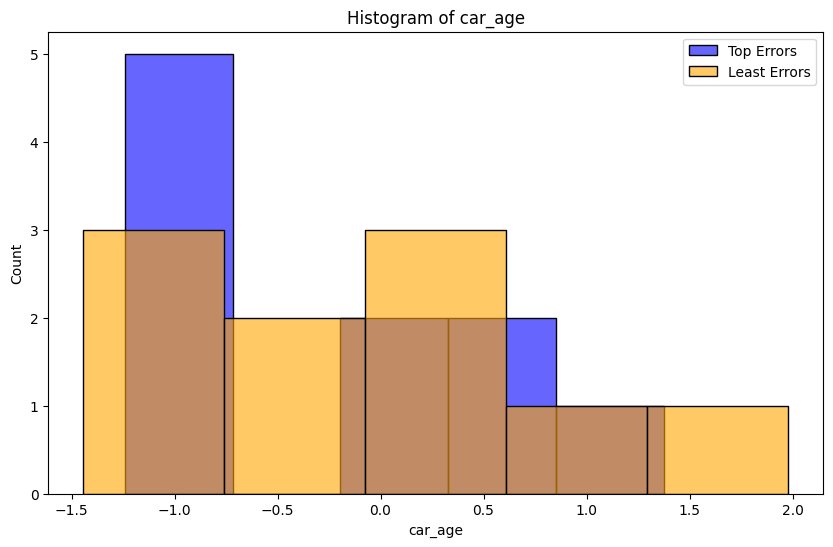

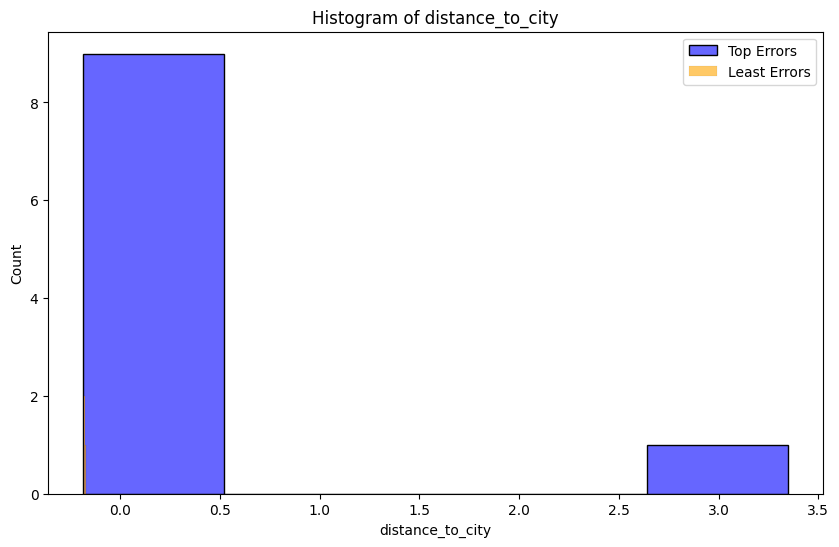

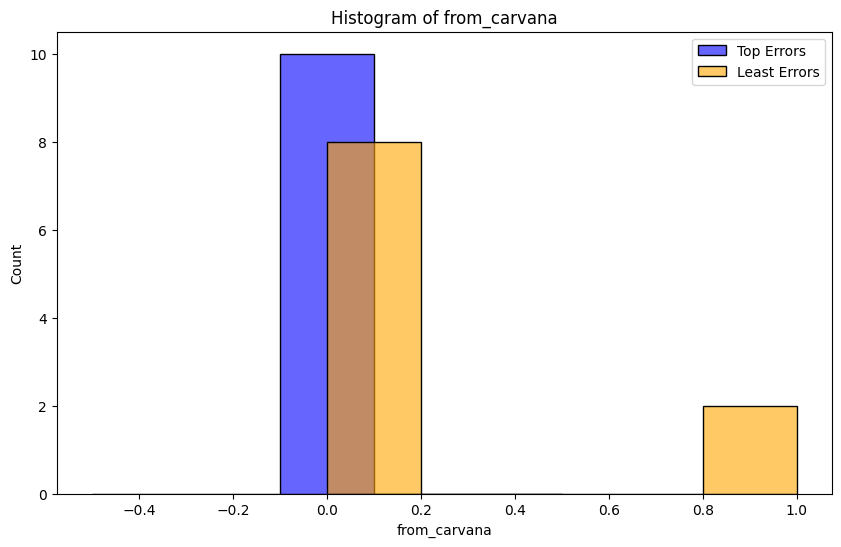

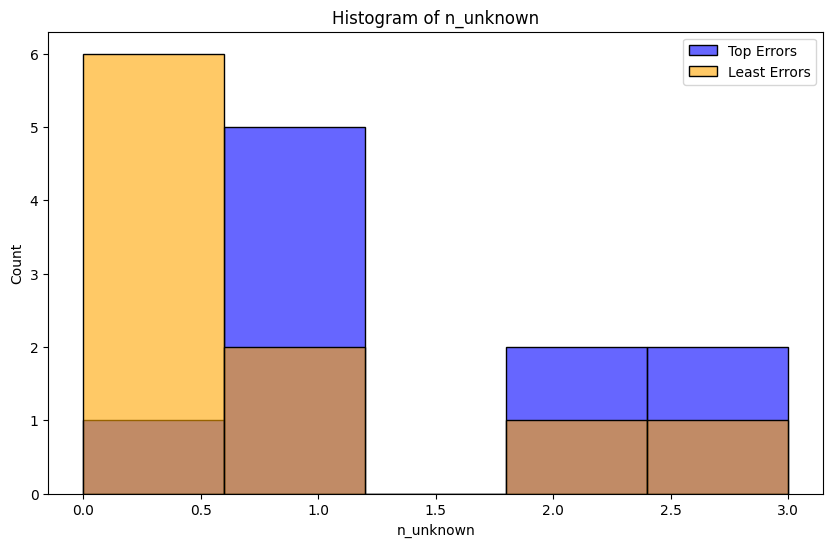

In [71]:
for col in top_errors.select_dtypes(np.number):
    plt.figure(figsize=(10, 6))
    # Plot histogram for top_errors
    sns.histplot(top_errors[col], bins=5, label='Top Errors', color='blue', alpha=0.6)
    # Plot histogram for least_errors
    sns.histplot(least_errors[col], bins=5, label='Least Errors', color='orange', alpha=0.6)
    plt.legend()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.show()

Finally lets see the results on test set

In [47]:
get_scores(random_search, test)

r2 score: 0.9304117391593756
MSE: 0.06931783560690553


(0.9304117391593756, 0.06931783560690553)

Similar performance to train and val sets. Model is robust enough.